In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sys

sys.path.append('../src/')

from initial_data_clean import *
from grouping_functions import *
from stat_functions import *

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [2]:
plt.style.use('fivethirtyeight')

In [3]:
years = list(us_county_df['year'].unique().astype(int))
years.sort()
years

[1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [4]:
gb_agg = GroupBy(us_agg_df)

In [5]:
both_sex, male, female = gb_agg.men_women_both_stats()

In [6]:
both_sex.drop('sex', axis=1, inplace=True)
both_sex

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,deaths,population,age_specific_rate,age_spec_se
3039,2016,44965,323127513,13.915559,0.065624
3040,2015,44193,321418820,13.749350,0.065404
3041,2014,42826,318857056,13.431097,0.064902
3042,2013,41149,316128839,13.016528,0.064168
3043,2012,40600,313914040,12.933477,0.064188
3044,2011,39518,311591917,12.682614,0.063799
3045,2010,38364,308745538,12.425767,0.063440
3046,2009,36909,306771529,12.031429,0.062626
3047,2008,36035,304093966,11.849956,0.062424
3048,2007,34598,301231207,11.485530,0.061748


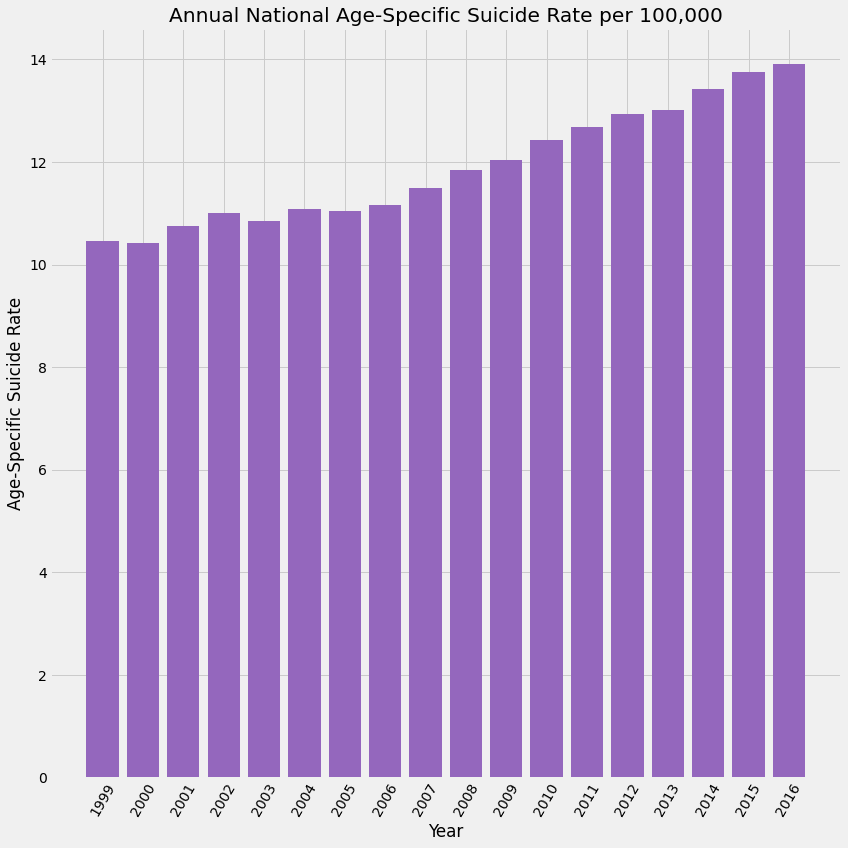

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(both_sex['year'], both_sex['age_specific_rate'], color='tab:purple')
ax.set_title('Annual National Age-Specific Suicide Rate per 100,000')
ax.set_xlabel('Year')
ax.set_ylabel('Age-Specific Suicide Rate')
#plt.ylim(bottom=6)
plt.xticks([i for i in range(1999, 2017)], rotation=60)
plt.tight_layout()
plt.savefig('../images/annual_national_rate.png')
plt.show()

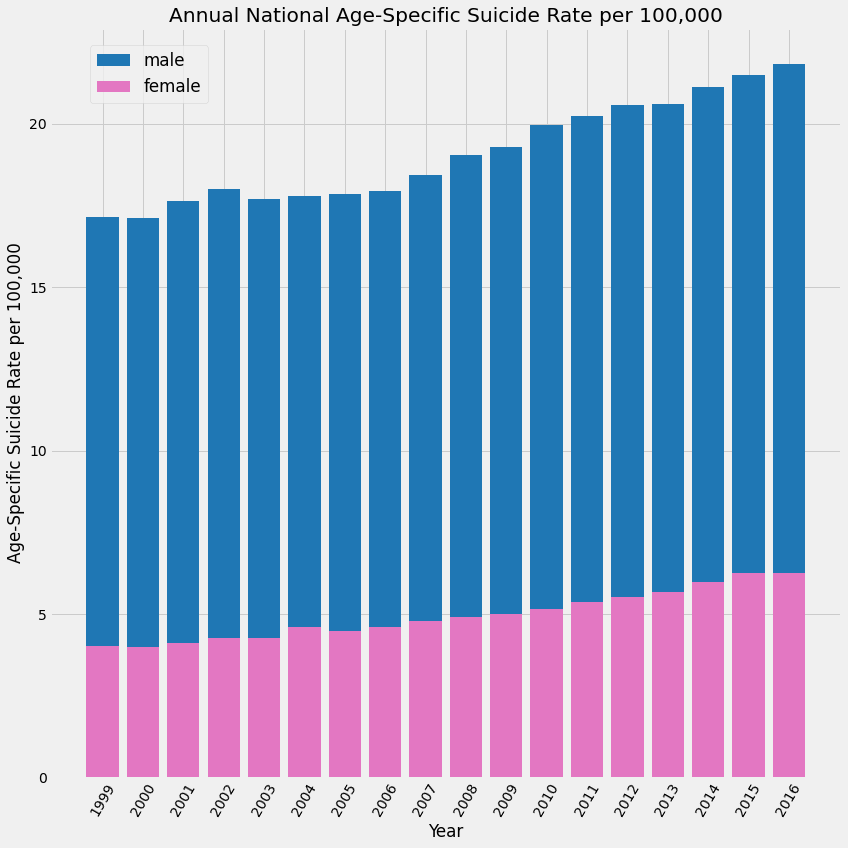

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
ax.bar(male['year'], male['age_specific_rate'], label='male', color='tab:blue')
ax.bar(female['year'], female['age_specific_rate'], 
       label='female', color='tab:pink')
ax.set_title('Annual National Age-Specific Suicide Rate per 100,000')
ax.set_xlabel('Year')
ax.set_ylabel('Age-Specific Suicide Rate per 100,000')
ax.legend(loc=(0.05,0.9), prop={'size':'large'})
#plt.ylim(bottom=10)
plt.xticks([i for i in range(1999, 2017)], rotation=60)
plt.tight_layout()
plt.savefig('../images/annual_m_f_rate.png')
plt.show()

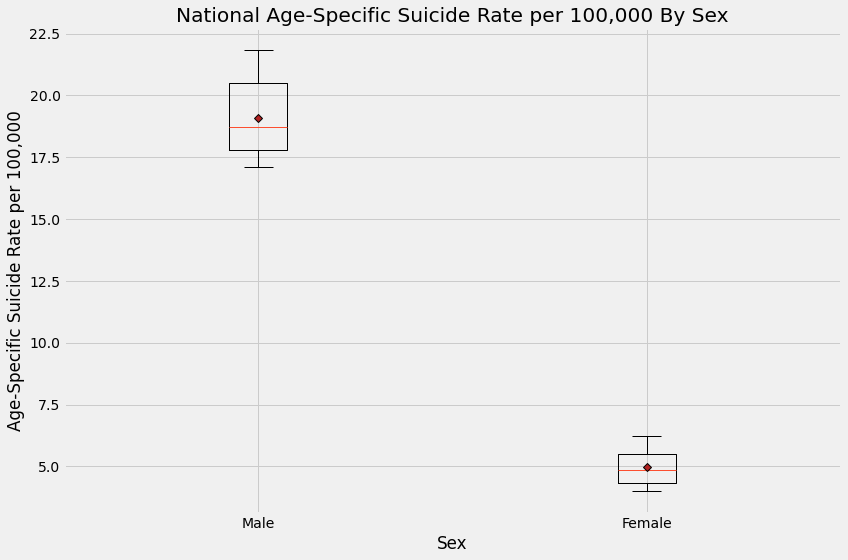

In [9]:
labels = ['Male', 'Female']
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(male_female_box_plot_df(male, female), 
           labels=labels, meanprops=meanpointprops, showmeans=True)
ax.set_title('National Age-Specific Suicide Rate per 100,000 By Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Age-Specific Suicide Rate per 100,000')
plt.tight_layout()
plt.savefig('../images/m_f_rate_box_plot.png')
plt.show()

In [10]:
#T-test m/f
def get_norm_coef(df):
    # This Returns the coef. of Normal dist
    # passing in data frame
    df = df.copy()
    mean_df = df['age_specific_rate'].mean()
    sqrt_df = np.sqrt(len(df['age_specific_rate']))
    std = (df['age_specific_rate'].std())/sqrt_df
    return mean_df, std

def normal_dist(mean, std):
    # This returns Normal dist with desired coefs
    return stats.norm(loc=mean, scale=std)

In [11]:
male_mean, male_std = get_norm_coef(male)
female_mean, female_std = get_norm_coef(female)

In [12]:
male_norm = normal_dist(male_mean, male_std)
female_norm = normal_dist(female_mean, female_std)
t_test = stats.ttest_ind(male['age_specific_rate'], female['age_specific_rate'], equal_var=False)

In [13]:
t_test

Ttest_indResult(statistic=34.51045427047852, pvalue=4.056464310171394e-22)

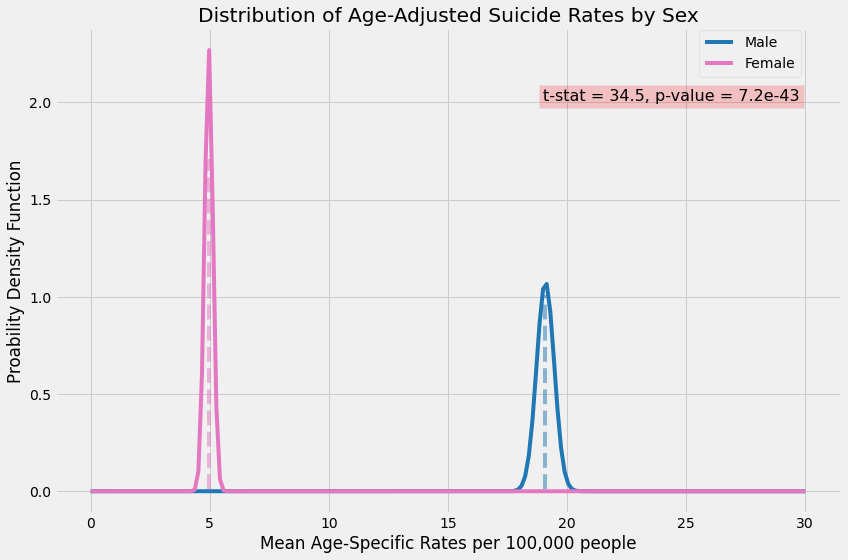

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.linspace(0, 30, 200)
ax.plot(x, male_norm.pdf(x), color='tab:blue', label='Male')
ax.plot(x, female_norm.pdf(x), color = 'tab:pink', label='Female')
ax.set_title('Distribution of Age-Adjusted Suicide Rates by Sex')
ax.set_xlabel('Mean Age-Specific Rates per 100,000 people')
ax.set_ylabel('Proability Density Function')
ax.axvline(male_mean, ymin=0.05, ymax=0.45, ls='--', alpha = 0.5, color='tab:blue')
ax.axvline(female_mean, 
           ymin=0.05, ymax=0.73, ls='--', alpha = 0.5, color='tab:pink')
plt.text(x=19,y=2.01,
        s=f't-stat = {t_test[0]:.1f}, p-value = 7.2e-43',
        fontsize=16,
        bbox=dict(facecolor='red', alpha=0.2))
plt.legend(loc=(0.82,0.9))
plt.tight_layout()
plt.savefig('../images/male_female_t_test.png')

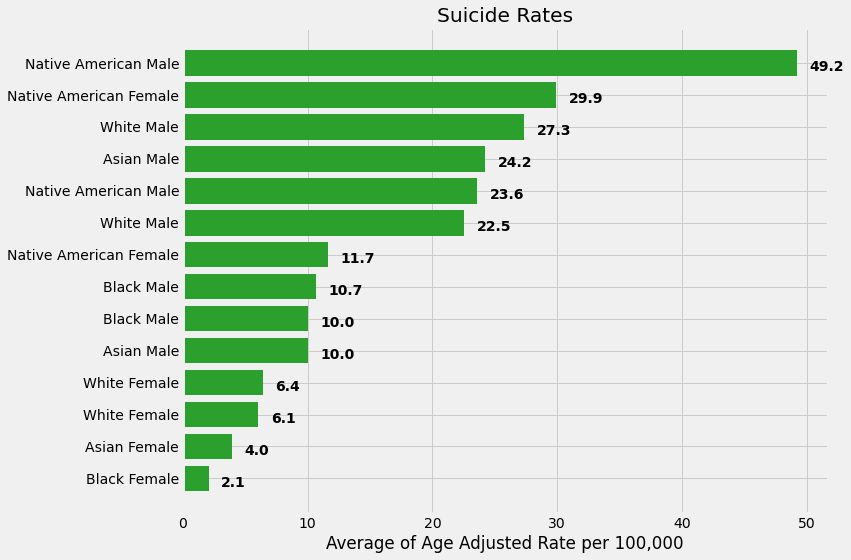

<Figure size 432x288 with 0 Axes>

In [24]:
#image not rendering correctly from save in VS code
w_m_metro = []
w_f_metro = []
w_m_nonmetro = []
w_f_nonmetro = []
b_m_metro = []
b_f_metro = []
b_m_nonmetro = []
b_f_nonmetro = []
i_m_metro = []
i_f_metro = []
i_m_nonmetro = []
i_f_nonmetro = []
a_m_metro = []
a_f_metro = []
a_m_nonmetro = []
a_f_nonmetro = []
dataframe = us_year_metro_race_df
for row in dataframe.iterrows():
    df = row[1]
    if df['gender'] == 'Male' and df['race'] == 'White' and df['metro_non_metro'] == 'Metro':
        w_m_metro.append(df.age_adjusted_rate)
    elif df.gender == 'Female' and df.race == 'White' and df.metro_non_metro == 'Metro':
        w_f_metro.append(df.age_adjusted_rate)
    elif df.gender == 'Male' and df.race == 'White' and df.metro_non_metro == 'Nonmetro':
        w_m_nonmetro.append(df.age_adjusted_rate)
    elif df.gender == 'Female' and df.race == 'White' and df.metro_non_metro == 'Nonmetro':
        w_f_nonmetro.append(df.age_adjusted_rate)

    elif df.gender == 'Male' and df.race == 'Black or African American' and df.metro_non_metro == 'Metro':
        b_m_metro.append(df.age_adjusted_rate)
    elif df.gender == 'Female' and df.race == 'Black or African American' and df.metro_non_metro == 'Metro':
        b_f_metro.append(df.age_adjusted_rate)
    elif df.gender == 'Male' and df.race == 'Black or African American' and df.metro_non_metro == 'Nonmetro':
        b_m_nonmetro.append(df.age_adjusted_rate)
    elif df.gender == 'Female' and df.race == 'Black or African American' and df.metro_non_metro == 'Nonmetro':
        b_f_nonmetro.append(df.age_adjusted_rate)

    elif df.gender == 'Male' and df.race == 'American Indian or Alaska Native' and df.metro_non_metro == 'Metro':
        i_m_metro.append(df.age_adjusted_rate)
    elif df.gender == 'Female' and df.race == 'American Indian or Alaska Native' and df.metro_non_metro == 'Metro':
        i_f_metro.append(df.age_adjusted_rate)
    elif df.gender == 'Male' and df.race == 'American Indian or Alaska Native' and df.metro_non_metro == 'Nonmetro':
        i_m_nonmetro.append(df.age_adjusted_rate)
    elif df.gender == 'Female' and df.race == 'American Indian or Alaska Native' and df.metro_non_metro == 'Nonmetro':
        i_f_nonmetro.append(df.age_adjusted_rate)

    elif df.gender == 'Male' and df.race == 'Asian or Pacific Islander' and df.metro_non_metro == 'Metro':
        a_m_metro.append(df.age_adjusted_rate)
    elif df.gender == 'Female' and df.race == 'Asian or Pacific Islander' and df.metro_non_metro == 'Metro':
        a_f_metro.append(df.age_adjusted_rate)
    elif df.gender == 'Male' and df.race == 'Asian or Pacific Islander' and df.metro_non_metro == 'Nonmetro':
        a_m_nonmetro.append(df.age_adjusted_rate)
    elif df.gender == 'Female' and df.race == 'Asian or Pacific Islander' and df.metro_non_metro == 'Nonmetro':
        a_f_nonmetro.append(df.age_adjusted_rate)
w_m_metro = np.array(w_m_metro)
w_f_metro = np.array(w_f_metro)
w_m_nonmetro = np.array(w_m_nonmetro)
w_f_nonmetro = np.array(w_f_nonmetro)
b_m_metro = np.array(b_m_metro)
b_f_metro = np.array(b_f_metro)
b_m_nonmetro = np.array(b_m_nonmetro)
b_f_nonmetro = np.array(b_f_nonmetro)
i_m_metro = np.array(i_m_metro)
i_f_metro = np.array(i_f_metro)
i_m_nonmetro = np.array(i_m_nonmetro)
i_f_nonmetro = np.array(i_f_nonmetro)
a_m_metro = np.array(a_m_metro)
a_f_metro = np.array(a_f_metro)
a_m_nonmetro = np.array(a_m_nonmetro)
a_f_nonmetro = np.array(a_f_nonmetro)
#left out b_f_nonmetro and a_f_nonmetro due to zero values
lst_of_lst = [w_m_metro, w_f_metro, w_m_nonmetro, w_f_nonmetro, b_m_metro, b_f_metro, b_m_nonmetro, 
            i_m_metro, i_f_metro, i_m_nonmetro, i_f_nonmetro, a_m_metro, a_f_metro, a_m_nonmetro]
labels = ('White Male Metro', 'White Female Metro', 'White Male Nonmetro', 'White Female Nonmetro', 
            'Black Male Metro', 'Black Female Metro', 'Black Male Nonmetro', 
            'Native American Male Metro', 'Native American Female Metro', 'Native American Male Nonmetro', 'Native American Female Nonmetro',
            'Asian Male Metro', 'Asian Female Metro', 'Asian Male Metro')
simple_labels = ('White Male', 'White Female', 'White Male', 'White Female', 
            'Black Male', 'Black Female', 'Black Male', 
            'Native American Male', 'Native American Female', 'Native American Male', 'Native American Female',
            'Asian Male', 'Asian Female', 'Asian Male')
y_pos = np.arange(len(labels))
means = []
for i in lst_of_lst:
    means.append(np.mean(i))
means_sorted, label_sorted = zip(*sorted(zip(means, simple_labels)))
# print(means)
# print(type(means_sorted))
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(y_pos, means_sorted, align='center', color='tab:green')
ax.set_yticks(y_pos)
ax.set_yticklabels(label_sorted)
ax.set_xlabel('Average of Age Adjusted Rate per 100,000')
ax.set_title('Suicide Rates')
for i, v in enumerate(means_sorted):
    ax.text(v + 1, i - 0.25, str(np.around(v, decimals=1)), fontweight='bold')
plt.tight_layout()
plt.show()
plt.savefig('../images/group_nonmetro.png')